<a href="https://colab.research.google.com/github/niruthikka24/Diabetes-Dataset-Preprocessing/blob/main/CS3120_Data_Pre_processing_Lab_Exercise_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot

from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
uploaded = files.upload()

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5,-1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                770 non-null    int64  
 1   Pregncies                 768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             766 non-null    float64
 4   SkinThickness             766 non-null    float64
 5   Insulin                   767 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  767 non-null    float64
 8   Age                       766 non-null    float64
 9   Outcome                   770 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 60.3 KB


In [ ]:
dataset.shape

(770, 10)

In [ ]:
dataset = dataset.drop_duplicates()
dataset.shape

(770, 10)

In [ ]:
dataset = dataset.drop_duplicates(subset=['Pregncies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
dataset.shape

(768, 10)

In [ ]:
dataset.isnull().sum()

Patient_ID                  0
Pregncies                   2
Glucose                     2
BloodPressure               4
SkinThickness               4
Insulin                     3
BMI                         2
DiabetesPedigreeFunction    3
Age                         4
Outcome                     0
dtype: int64

In [ ]:
(dataset==0).sum()

Patient_ID                    0
Pregncies                   110
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     372
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
df = dataset.copy(deep = True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
df.isnull().sum()

Patient_ID                    0
Pregncies                     2
Glucose                       7
BloodPressure                39
SkinThickness               231
Insulin                     375
BMI                          13
DiabetesPedigreeFunction      3
Age                           4
Outcome                       0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,768.0,384.500000,221.846794,1.000,192.750,384.500,576.250,768.00
Pregncies,766.0,3.828982,3.392532,-6.000,1.000,3.000,6.000,17.00
Glucose,761.0,121.264126,31.789147,-129.000,99.000,117.000,141.000,199.00
BloodPressure,729.0,70.914952,41.604673,-1000.000,64.000,72.000,80.000,122.00
SkinThickness,537.0,29.178771,10.488875,7.000,22.000,29.000,36.000,99.00
Insulin,393.0,155.587786,118.924659,14.000,76.000,125.000,190.000,846.00
BMI,755.0,32.467285,6.928391,18.200,27.500,32.300,36.600,67.10
DiabetesPedigreeFunction,765.0,0.472037,0.331708,0.078,0.244,0.371,0.626,2.42
Age,764.0,33.243455,11.782360,21.000,24.000,29.000,41.000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.000,1.000,1.00


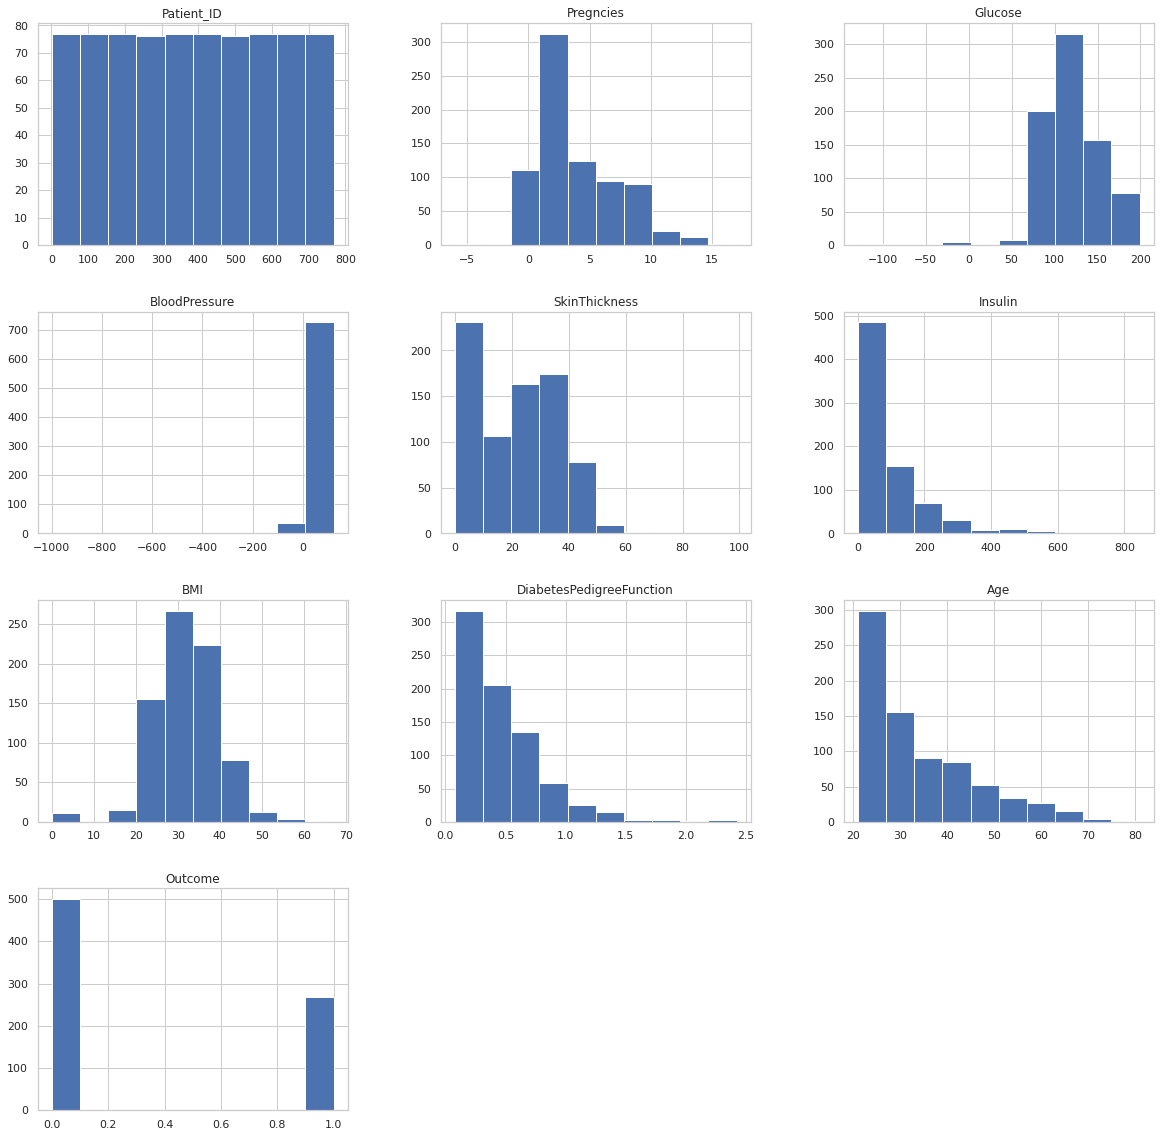

In [ ]:
p = dataset.hist(figsize = (20,20))

In [ ]:
#replacing the missing values in the df1 dataset
df1 = df.copy(deep = True)
df1.head()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,2,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,3,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5,-1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [ ]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

In [ ]:
df1.Pregncies.value_counts()

 1.0     135
 0.0     110
 2.0     102
 3.0      75
 4.0      68
 5.0      56
 6.0      49
 7.0      45
 8.0      38
 9.0      28
 10.0     24
 11.0     11
 13.0     10
 12.0      9
 14.0      2
-1.0       1
 15.0      1
 17.0      1
-6.0       1
Name: Pregncies, dtype: int64

In [ ]:
print(df1.Pregncies.mean())
print(df1.Pregncies.median())
print(df1.Pregncies.mode())

3.828981723237598
3.0
0    1.0
dtype: float64


In [ ]:
df1[df1['Pregncies'].isna()]

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
292,293,NaN,128.0,78.0,37.0,182.0,43.3,1.224,31.0,1
546,547,NaN,187.0,76.0,27.0,207.0,43.6,1.034,53.0,1


In [ ]:
medpreg = df1.Pregncies.median()
print(medpreg)
df1['Pregncies'] = df1['Pregncies'].fillna(medpreg)
print(df1.Pregncies.isnull().sum())

3.0
0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


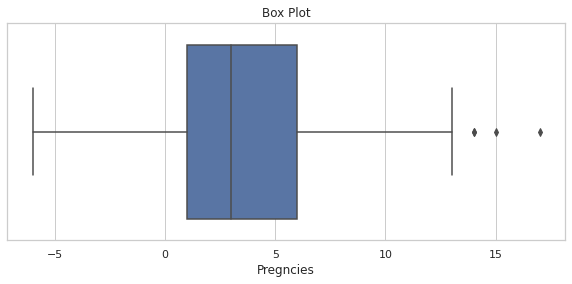

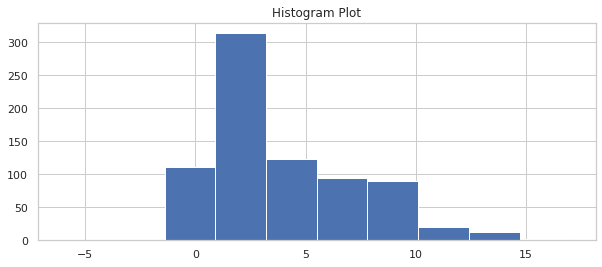

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


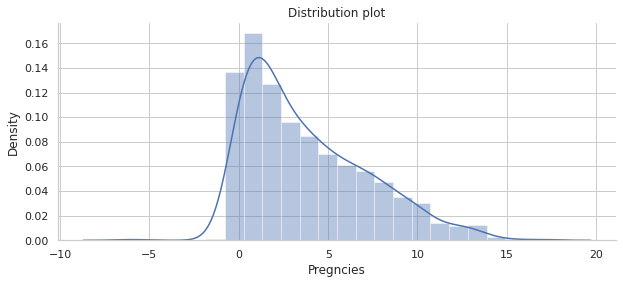

In [ ]:
Box_plots(df1['Pregncies'])
hist_plots(df1['Pregncies'])
dist_plots(df1['Pregncies'])

In [ ]:
Q1 = df1.Pregncies.quantile(0.25)
Q3 = df1.Pregncies.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df1[(df1['Pregncies']>=14)|(df1['Pregncies']<0)]

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,5,-1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
88,89,15.0,136.0,70.0,32.0,110.0,37.1,0.153,43.0,1
159,160,17.0,163.0,72.0,41.0,114.0,40.9,0.817,47.0,1
243,244,-6.0,119.0,50.0,22.0,176.0,27.1,1.318,33.0,1
298,299,14.0,100.0,78.0,25.0,184.0,36.6,0.412,46.0,1
455,456,14.0,175.0,62.0,30.0,NaN,33.6,0.212,38.0,1


In [ ]:
Q1 = df1.Pregncies.quantile(0.25)
Q3 = df1.Pregncies.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)
medpreg = df.Pregncies.median()
print(medpreg)
# df1['Pregncies']=np.where(df1['Pregncies']>upper_whisker,medpreg,np.where(df1['Pregncies']<0,medpreg,df1['Pregncies']))
df1['Pregncies']=np.where(df1['Pregncies']<0,medpreg,df1['Pregncies'])

1.0
6.0
-6.5
13.5
3.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


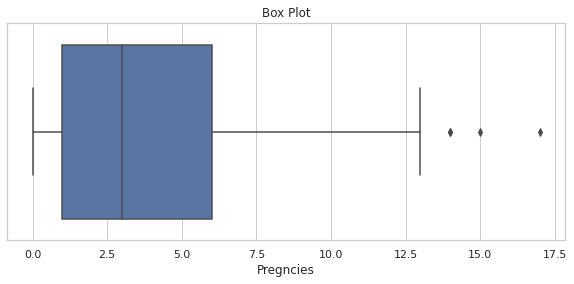

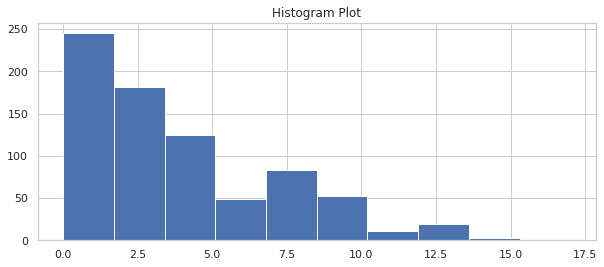

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


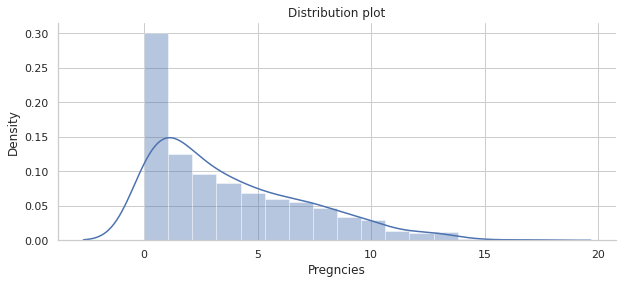

In [ ]:
Box_plots(df1['Pregncies'])
hist_plots(df1['Pregncies'])
dist_plots(df1['Pregncies'])

In [ ]:
dataset.Glucose.value_counts()

99.0     17
100.0    17
111.0    14
125.0    14
106.0    14
         ..
182.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 137, dtype: int64

In [ ]:
df.Glucose.unique()

array([ 148.,   85.,  183.,   89.,  137.,  116.,   78.,  115.,  197.,
        125.,  110.,  168.,  139.,  189.,  166.,  100.,  118.,  107.,
        103.,  126.,   99.,  196.,  119.,  143.,  147.,   97.,  145.,
        117.,  109.,  158.,   88.,   92.,  122.,  138.,  102.,   90.,
        111.,  180.,  133.,  106.,  171.,  159.,  146.,   71.,  105.,
        101.,  176.,  150.,   73.,  187.,   84.,   44.,  141.,  114.,
         95.,  129.,   79.,   nan,   62.,  131.,  112.,  113.,   74.,
         83.,  136.,   80.,  123.,   81.,  134.,  142.,  144.,   93.,
        163.,  151.,   96.,  155.,   76.,  160.,  124.,  162.,  132.,
        120.,  173.,  170.,  128.,  108.,  154.,   57.,  156.,  153.,
        188.,  152.,  104.,   87.,   75.,  179.,  130.,  194.,  181.,
        135.,  184.,  140.,  177.,  164.,   91.,  165.,   86.,  191.,
        161.,  167.,   77.,  182.,  157.,  178.,   61.,   98.,  127.,
         82.,  193.,   72.,  172.,   94.,  175.,  195.,   68.,  186.,
        198.,  121.,

In [ ]:
print(df1.Glucose.mean())
print(df1.Glucose.median())
print(df1.Glucose.mode())

121.26412614980289
117.0
0     99.0
1    100.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


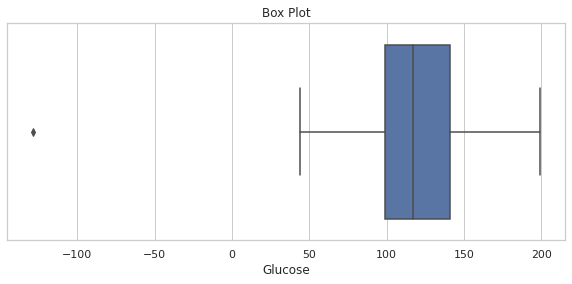

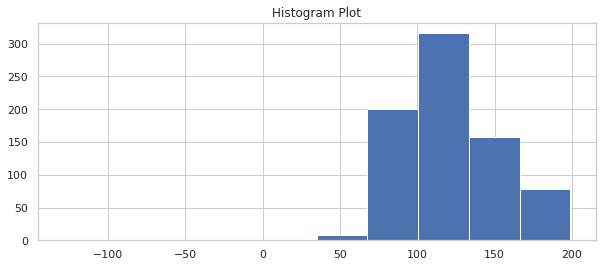

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


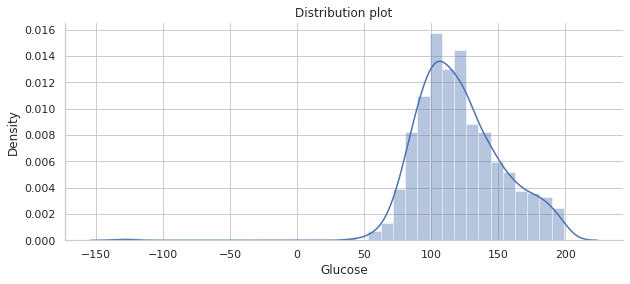

In [ ]:
Box_plots(df1['Glucose'])
hist_plots(df1['Glucose'])
dist_plots(df1['Glucose'])

In [ ]:
df1[df1['Glucose'].isna()]

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,76,1.0,NaN,48.0,20.0,NaN,24.7,0.140,22.0,0
151,152,4.0,NaN,65.0,NaN,NaN,21.9,0.432,37.0,0
182,183,1.0,NaN,74.0,20.0,23.0,27.7,0.299,21.0,0
258,259,1.0,NaN,50.0,16.0,375.0,25.9,0.655,24.0,0
342,343,1.0,NaN,68.0,35.0,NaN,32.0,0.389,22.0,0
349,350,5.0,NaN,80.0,32.0,NaN,41.0,0.346,37.0,1
502,503,6.0,NaN,68.0,41.0,NaN,39.0,0.727,41.0,1


In [ ]:
meanglu = round(df1.Glucose.mean(),0)
print(meanglu)
df1['Glucose'] = df1['Glucose'].fillna(meanglu)
print(df1.Glucose.isnull().sum())

121.0
0


In [ ]:
Q1 = df1.Glucose.quantile(0.25)
Q3 = df1.Glucose.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)

99.0
140.0
37.5
201.5


In [ ]:
Q1 = df1.Glucose.quantile(0.25)
Q3 = df1.Glucose.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)

meanglu = round(df.Glucose.mean(),0)
print(meanglu)
df1['Glucose']=np.where(df1['Glucose']>upper_whisker,meanglu,np.where(df1['Glucose']<lower_whisker,meanglu,df1['Glucose']))

99.0
140.0
37.5
201.5
121.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


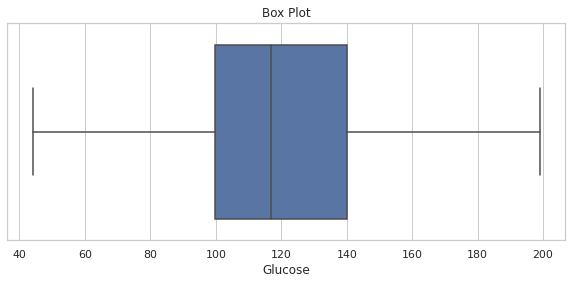

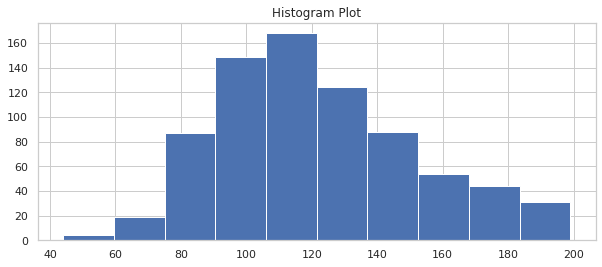

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


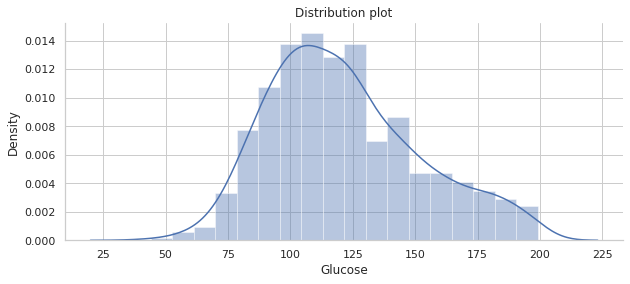

In [ ]:
Box_plots(df1['Glucose'])
hist_plots(df1['Glucose'])
dist_plots(df1['Glucose'])

In [ ]:
df1.BloodPressure.unique()

array([   72.,    66.,    64.,    40.,    74.,    50.,    nan,    70.,
          96.,    92.,    80.,    60.,    84.,    30.,    88.,    90.,
          94.,    76.,    82.,    75.,    58.,    78.,    68.,   110.,
          56., -1000.,    62.,    85.,    86.,    48.,    44.,    65.,
         108.,    55.,   122.,    54.,    52.,    98.,   104.,    95.,
          46.,   102.,   100.,    61.,    24.,    38.,   106.,   114.])

In [ ]:
print(df1.BloodPressure.mean())
print(df1.BloodPressure.median())
print(df1.BloodPressure.mode())

70.91495198902606
72.0
0    70.0
dtype: float64


In [ ]:
df1.BloodPressure.value_counts()

 70.0      56
 74.0      51
 68.0      45
 72.0      44
 78.0      44
 64.0      43
 80.0      40
 76.0      39
 60.0      37
 62.0      33
 66.0      30
 82.0      30
 88.0      25
 84.0      23
 90.0      22
 58.0      21
 86.0      21
 50.0      13
 56.0      12
 52.0      11
 54.0      11
 75.0       8
 92.0       7
 65.0       7
 85.0       6
 94.0       6
 48.0       5
 44.0       4
 96.0       4
 106.0      3
 98.0       3
 100.0      3
 110.0      3
 46.0       2
 104.0      2
 55.0       2
 30.0       2
 108.0      2
 24.0       1
 38.0       1
 61.0       1
 122.0      1
 102.0      1
 95.0       1
 40.0       1
-1000.0     1
 114.0      1
Name: BloodPressure, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


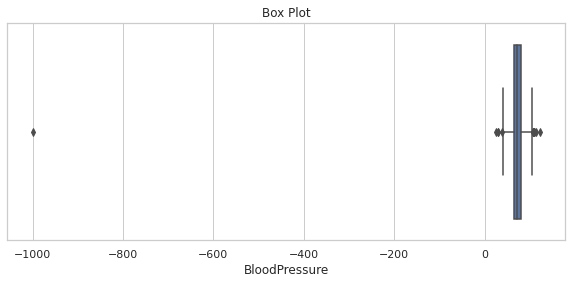

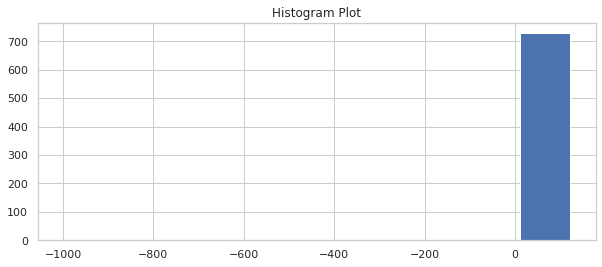

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


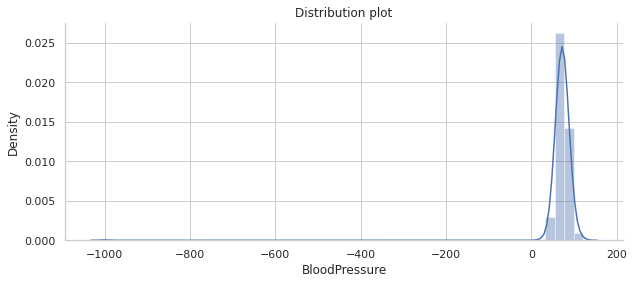

In [ ]:
Box_plots(df1['BloodPressure'])
hist_plots(df1['BloodPressure'])
dist_plots(df1['BloodPressure'])

In [ ]:
df1[df1['BloodPressure'].isna()]

In [ ]:
medbp = df1.BloodPressure.median()
print(medbp)
df1['BloodPressure'] = df1['BloodPressure'].fillna(medbp)
print(df1.BloodPressure.isnull().sum())

72.0
0


In [ ]:
Q1 = df1.BloodPressure.quantile(0.25)
Q3 = df1.BloodPressure.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)

medbp = df1.BloodPressure.median()
print(medbp)
df1['BloodPressure']=np.where(df1['BloodPressure']<lower_whisker,medbp,df1['BloodPressure'])

64.0
80.0
40.0
104.0
72.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


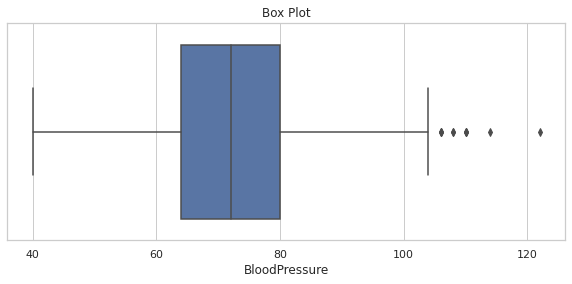

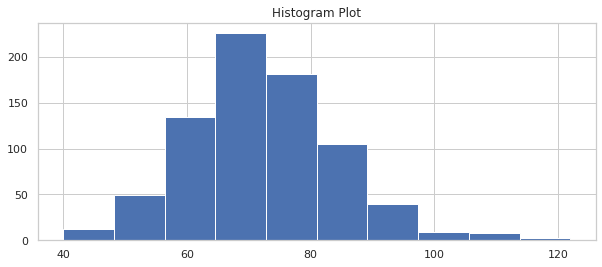

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


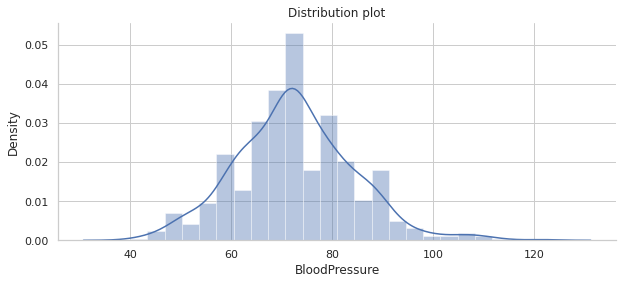

In [ ]:
Box_plots(df1['BloodPressure'])
hist_plots(df1['BloodPressure'])
dist_plots(df1['BloodPressure'])

In [ ]:
df1.BMI.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  nan, 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [ ]:
print(df1.BMI.mean())
print(df1.BMI.median())
print(df1.BMI.mode())

32.4672847682119
32.3
0    32.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


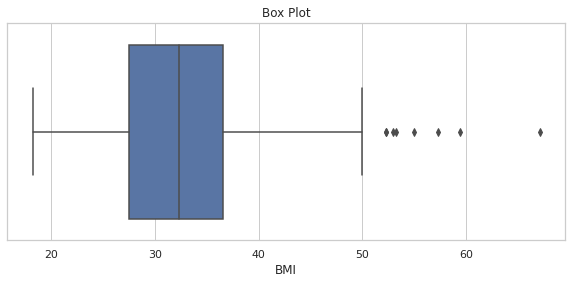

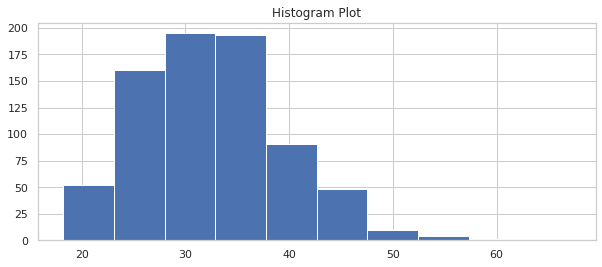

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


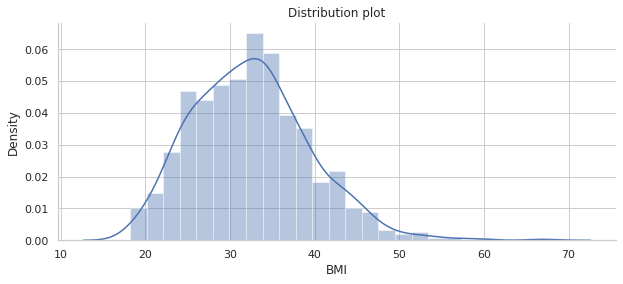

In [ ]:
Box_plots(df1['BMI'])
hist_plots(df1['BMI'])
dist_plots(df1['BMI'])

In [ ]:
df1.BMI.value_counts()

32.0    13
31.6    12
31.2    12
32.4    10
33.3    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 247, dtype: int64

In [ ]:
medbmi = df1.BMI.median()
print(medbmi)
df1['BMI'] = df1['BMI'].fillna(medbmi)
print(df1.BMI.isnull().sum())

32.3
0


In [ ]:
Q1 = df1.BMI.quantile(0.25)
Q3 = df1.BMI.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)

medbmi = df1.BMI.median()
print(medbmi)
df1['BMI']=np.where(df1['BMI']>upper_whisker,medbmi,df1['BMI'])

27.575000000000003
36.6
14.037500000000005
50.1375
32.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


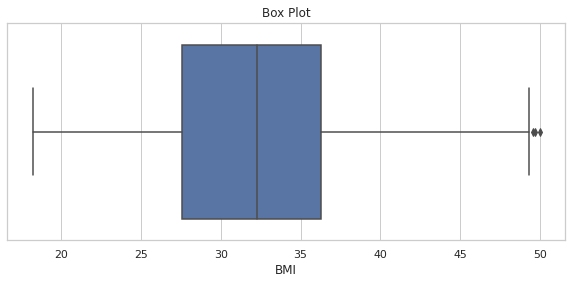

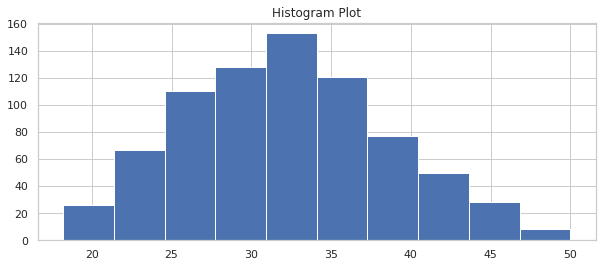

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


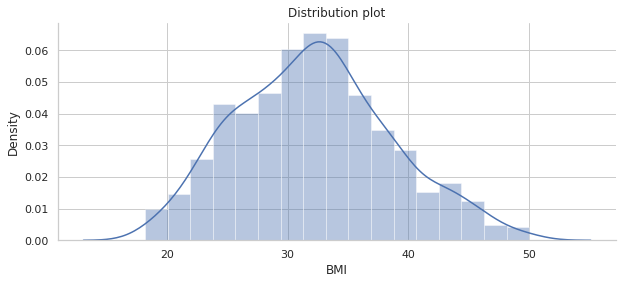

In [ ]:
Box_plots(df1['BMI'])
hist_plots(df1['BMI'])
dist_plots(df1['BMI'])

In [ ]:
df1.Age.unique()

array([50., 31., 32., 21., 33., nan, 26., 29., 53., 54., 30., 57., 59.,
       51., 27., 41., 43., 22., 38., 60., 28., 45., 35., 46., 56., 37.,
       48., 40., 25., 24., 58., 42., 44., 39., 36., 23., 34., 61., 69.,
       62., 55., 65., 47., 52., 66., 49., 63., 67., 72., 81., 64., 70.,
       68.])

In [ ]:
print(df1.Age.mean())
print(df1.Age.median())
print(df1.Age.mode())

33.2434554973822
29.0
0    22.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


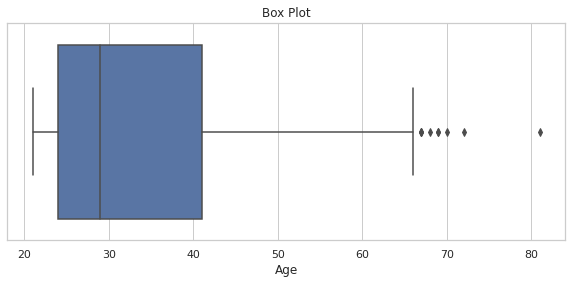

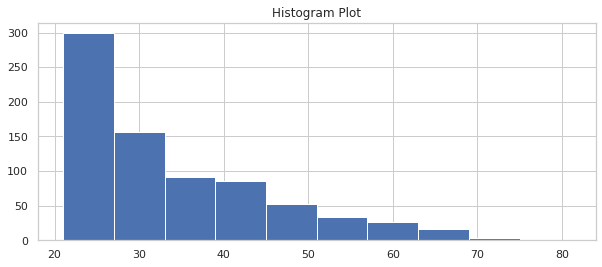

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


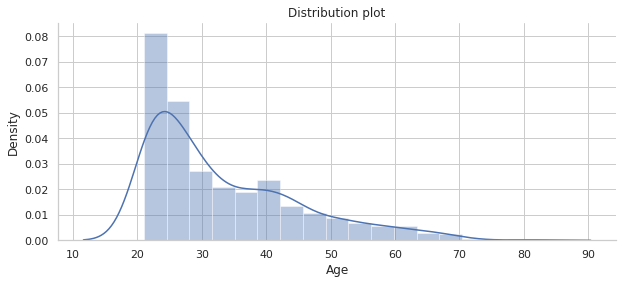

In [ ]:
Box_plots(df1['Age'])
hist_plots(df1['Age'])
dist_plots(df1['Age'])

In [ ]:
df1[df1['Age'].isna()]

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,6,5.0,116.0,74.0,NaN,NaN,25.6,0.201,NaN,0
11,12,10.0,168.0,74.0,NaN,NaN,38.0,0.537,NaN,1
68,69,1.0,95.0,66.0,13.0,38.0,19.6,0.334,NaN,0
583,584,8.0,100.0,76.0,NaN,NaN,38.7,0.190,NaN,0


In [ ]:
meanage = round(df1.Age.mean(),0)
print(meanage)
df1['Age'] = df1['Age'].fillna(meanage)
print(df1.Age.isnull().sum())

33.0
0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


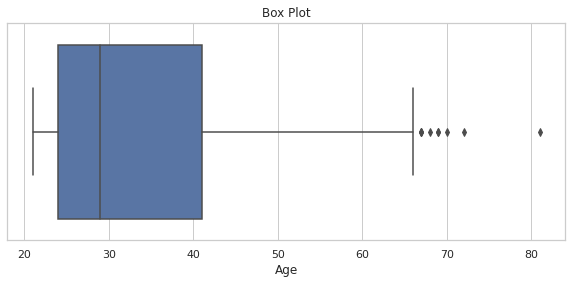

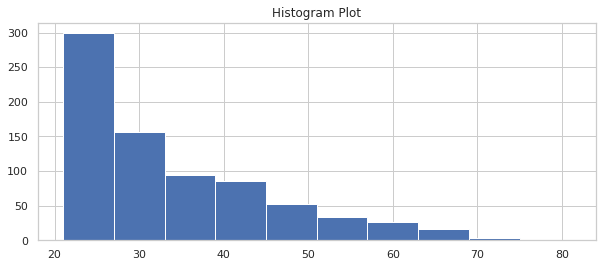

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


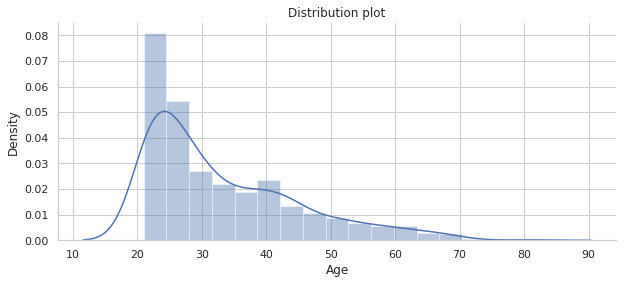

In [ ]:
Box_plots(df1['Age'])
hist_plots(df1['Age'])
dist_plots(df1['Age'])

In [ ]:
df1.isna().sum()

Patient_ID                    0
Pregncies                     0
Glucose                       0
BloodPressure                 0
SkinThickness               231
Insulin                     375
BMI                           0
DiabetesPedigreeFunction      3
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df1.describe()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,537.000000,393.000000,768.000000,765.000000,768.000000,768.000000
mean,384.500000,3.843750,121.587240,72.582031,29.178771,155.587786,32.215625,0.472037,33.242188,0.348958
std,221.846794,3.365453,30.324326,11.675582,10.488875,118.924659,6.404724,0.331708,11.751610,0.476951
min,1.000000,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.750000,64.000000,22.000000,76.000000,27.575000,0.244000,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,576.250000,6.000000,140.000000,80.000000,36.000000,190.000000,36.300000,0.626000,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,50.000000,2.420000,81.000000,1.000000


In [ ]:
df1.to_csv('preprocessed1.csv')
files.download('preprocessed1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Day 2 - Columns to be treated: SkinThickness, Insulin and DiabetesPedigreeFunction

In [ ]:
uploaded = files.upload()

Saving preprocessed1.csv to preprocessed1.csv


In [ ]:
df = pd.read_csv('preprocessed1.csv')
df.head()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35.0,NaN,33.6,0.627,50,1
1,2,1,85,66,29.0,NaN,26.6,0.351,31,0
2,3,8,183,64,NaN,NaN,23.3,0.672,32,1
3,4,1,89,66,23.0,94.0,28.1,0.167,21,0
4,5,3,137,40,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.describe()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,537.000000,393.000000,768.000000,765.000000,768.000000,768.000000
mean,384.500000,3.843750,121.587240,72.582031,29.178771,155.587786,32.215625,0.472037,33.242188,0.348958
std,221.846794,3.365453,30.324326,11.675582,10.488875,118.924659,6.404724,0.331708,11.751610,0.476951
min,1.000000,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.750000,64.000000,22.000000,76.000000,27.575000,0.244000,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,576.250000,6.000000,140.000000,80.000000,36.000000,190.000000,36.300000,0.626000,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,50.000000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum()

Patient_ID                    0
Pregncies                     0
Glucose                       0
BloodPressure                 0
SkinThickness               231
Insulin                     375
BMI                           0
DiabetesPedigreeFunction      3
Age                           0
Outcome                       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


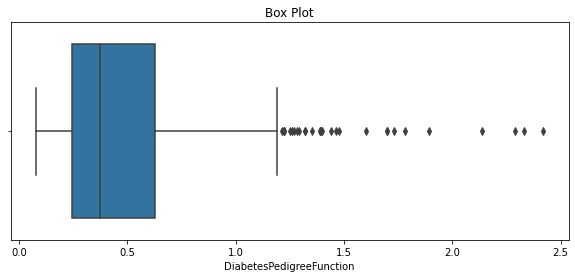

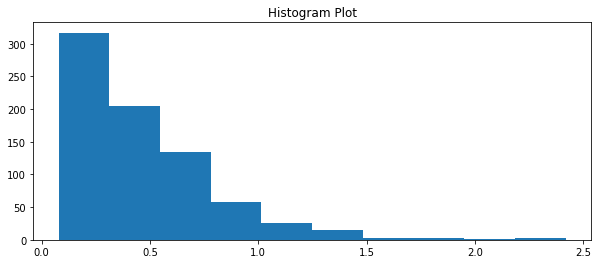

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


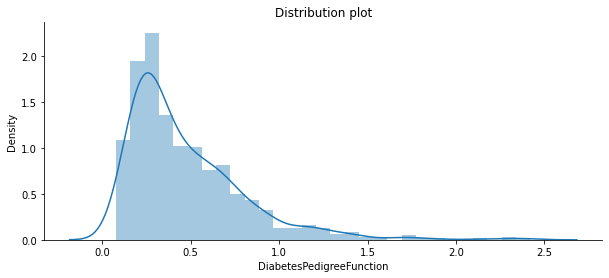

In [ ]:
Box_plots(df['DiabetesPedigreeFunction'])
hist_plots(df['DiabetesPedigreeFunction'])
dist_plots(df['DiabetesPedigreeFunction'])

In [ ]:
df.DiabetesPedigreeFunction.unique()

In [ ]:
print(df.DiabetesPedigreeFunction.mean())
print(df.DiabetesPedigreeFunction.median())
print(df.DiabetesPedigreeFunction.mode())

0.47203660130718894
0.371
0    0.254
1    0.258
dtype: float64


In [ ]:
meddpf = df.DiabetesPedigreeFunction.median()
print(meddpf)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].fillna(meddpf)
print(df.DiabetesPedigreeFunction.isnull().sum())

0.371
0


In [ ]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)

# medbmi = df1.BMI.median()
# print(medbmi)
# df1['BMI']=np.where(df1['BMI']>upper_whisker,medbmi,df1['BMI'])

0.244
0.6245
-0.3267500000000001
1.1952500000000001


In [ ]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 3
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)

0.244
0.6245
-0.8975000000000002
1.7660000000000002


In [ ]:
df[df['DiabetesPedigreeFunction'] >= 1.1952500000000001]

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,5,3,137,40,35.0,168.0,43.1,2.288,33,1
12,13,10,139,80,NaN,NaN,27.1,1.441,57,0
39,40,4,111,72,47.0,207.0,37.1,1.390,56,1
45,46,0,180,66,39.0,NaN,42.0,1.893,25,1
58,59,0,146,82,NaN,NaN,40.5,1.781,44,0
100,101,1,163,72,NaN,NaN,39.0,1.222,33,1
147,148,2,106,64,35.0,119.0,30.5,1.400,34,0
187,188,1,128,98,41.0,58.0,32.0,1.321,33,1
218,219,5,85,74,22.0,NaN,29.0,1.224,32,1
228,229,4,197,70,39.0,744.0,36.7,2.329,31,0


In [ ]:
df[df['DiabetesPedigreeFunction'] >= 1.7660000000000002]

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,5,3,137,40,35.0,168.0,43.1,2.288,33,1
45,46,0,180,66,39.0,NaN,42.0,1.893,25,1
58,59,0,146,82,NaN,NaN,40.5,1.781,44,0
228,229,4,197,70,39.0,744.0,36.7,2.329,31,0
370,371,3,173,82,48.0,465.0,38.4,2.137,25,1
445,446,0,180,78,63.0,14.0,32.3,2.420,25,1


In [ ]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 3
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(round(upper_whisker,3))
df['DiabetesPedigreeFunction']=np.where(df['DiabetesPedigreeFunction']>upper_whisker,round(upper_whisker,3),df['DiabetesPedigreeFunction'])

0.244
0.6245
-0.8975000000000002
1.766


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


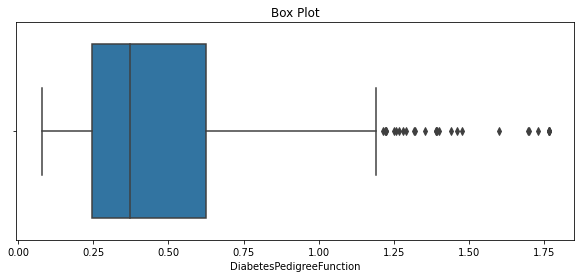

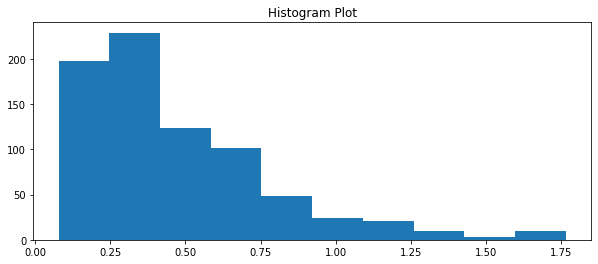

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


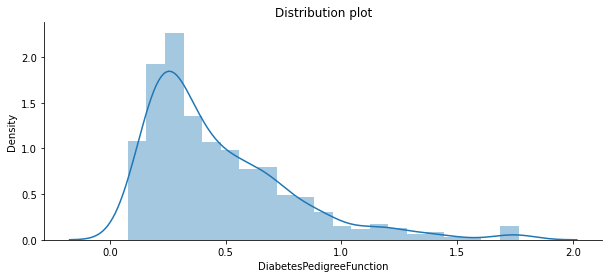

In [ ]:
Box_plots(df['DiabetesPedigreeFunction'])
hist_plots(df['DiabetesPedigreeFunction'])
dist_plots(df['DiabetesPedigreeFunction'])

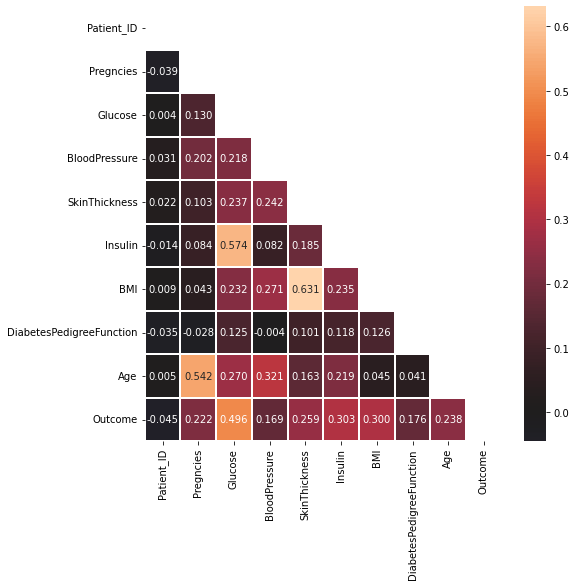

In [ ]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()

In [ ]:
df.corr()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Patient_ID,1.000000,-0.039226,0.003664,0.030518,0.022185,-0.014034,0.009480,-0.035320,0.005178,-0.045184
Pregncies,-0.039226,1.000000,0.129688,0.202197,0.102694,0.083733,0.043361,-0.028026,0.541960,0.221641
Glucose,0.003664,0.129688,1.000000,0.218109,0.236503,0.574327,0.232245,0.125280,0.269862,0.496302
BloodPressure,0.030518,0.202197,0.218109,1.000000,0.241643,0.081763,0.271159,-0.004330,0.320738,0.169278
SkinThickness,0.022185,0.102694,0.236503,0.241643,1.000000,0.185294,0.631219,0.100567,0.162573,0.258929
Insulin,-0.014034,0.083733,0.574327,0.081763,0.185294,1.000000,0.234593,0.118160,0.218815,0.303417
BMI,0.009480,0.043361,0.232245,0.271159,0.631219,0.234593,1.000000,0.126361,0.044589,0.299794
DiabetesPedigreeFunction,-0.035320,-0.028026,0.125280,-0.004330,0.100567,0.118160,0.126361,1.000000,0.040701,0.175788
Age,0.005178,0.541960,0.269862,0.320738,0.162573,0.218815,0.044589,0.040701,1.000000,0.238217
Outcome,-0.045184,0.221641,0.496302,0.169278,0.258929,0.303417,0.299794,0.175788,0.238217,1.000000


In [ ]:
dfreg = pd.DataFrame(data = df, columns = ['Age','BMI','Glucose','BloodPressure','SkinThickness'])
print(dfreg.head())
print(dfreg.shape)

   Age   BMI  Glucose  BloodPressure  SkinThickness
0   50  33.6      148             72           35.0
1   31  26.6       85             66           29.0
2   32  23.3      183             64            NaN
3   21  28.1       89             66           23.0
4   33  43.1      137             40           35.0
(768, 5)


In [ ]:
dfreg.isna().sum()

Age                0
BMI                0
Glucose            0
BloodPressure      0
SkinThickness    231
dtype: int64

In [ ]:
traintest = dfreg.dropna()
traintest.shape

(537, 5)

In [ ]:
traintest.head()

,Age,BMI,Glucose,BloodPressure,SkinThickness
0,50,33.6,148,72,35.0
1,31,26.6,85,66,29.0
3,21,28.1,89,66,23.0
4,33,43.1,137,40,35.0
6,26,31.0,78,50,32.0


In [ ]:
traintestx = traintest.drop(['SkinThickness'],axis=1)
traintesty = traintest['SkinThickness']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(traintestx,traintesty,test_size=0.2,random_state=0)

In [ ]:
missdf = dfreg[pd.isnull(dfreg).any(axis=1)]
missdf = missdf.drop(['SkinThickness'],axis=1)
missdf.head()

,Age,BMI,Glucose,BloodPressure
2,32,23.3,183,64
5,33,25.6,116,74
7,29,35.3,115,72
9,54,32.3,125,96
10,30,37.6,110,92


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.42698618763220564

In [ ]:
pred = model.predict(missdf)

In [ ]:
pred

In [ ]:
missdf['SkinThickness'] = pred.round(0)
missdf.head()

,Age,BMI,Glucose,BloodPressure,SkinThickness
2,32,23.3,183,64,21.0
5,33,25.6,116,74,22.0
7,29,35.3,115,72,31.0
9,54,32.3,125,96,31.0
10,30,37.6,110,92,34.0


In [ ]:
imputeddf = pd.concat([missdf,traintest])
print(imputeddf.head())
print(imputeddf.shape)

    Age   BMI  Glucose  BloodPressure  SkinThickness
2    32  23.3      183             64           21.0
5    33  25.6      116             74           22.0
7    29  35.3      115             72           31.0
9    54  32.3      125             96           31.0
10   30  37.6      110             92           34.0
(768, 5)


In [ ]:
imputeddf.columns

Index(['Age', 'BMI', 'Glucose', 'BloodPressure', 'SkinThickness'], dtype='object')

In [ ]:
df1 = df.drop(['Age', 'BMI', 'Glucose', 'BloodPressure', 'SkinThickness'],axis=1)
df1.head()

,Patient_ID,Pregncies,Insulin,DiabetesPedigreeFunction,Outcome
0,1,6,NaN,0.627,1
1,2,1,NaN,0.351,0
2,3,8,NaN,0.672,1
3,4,1,94.0,0.167,0
4,5,3,168.0,1.766,1


In [ ]:
df2 = pd.concat([df1, imputeddf], axis=1)
print(df2.shape)
print(df2.head())

In [ ]:
df2.head()

,Patient_ID,Pregncies,Insulin,DiabetesPedigreeFunction,Outcome,Age,BMI,Glucose,BloodPressure,SkinThickness
0,1,6,NaN,0.627,1,50,33.6,148,72,35.0
1,2,1,NaN,0.351,0,31,26.6,85,66,29.0
2,3,8,NaN,0.672,1,32,23.3,183,64,21.0
3,4,1,94.0,0.167,0,21,28.1,89,66,23.0
4,5,3,168.0,1.766,1,33,43.1,137,40,35.0


In [ ]:
df2.corr()

,Patient_ID,Pregncies,Insulin,DiabetesPedigreeFunction,Outcome,Age,BMI,Glucose,BloodPressure,SkinThickness
Patient_ID,1.000000,-0.039226,-0.014034,-0.035320,-0.045184,0.005178,0.009480,0.003664,0.030518,-0.000139
Pregncies,-0.039226,1.000000,0.083733,-0.028026,0.221641,0.541960,0.043361,0.129688,0.202197,0.093630
Insulin,-0.014034,0.083733,1.000000,0.118160,0.303417,0.218815,0.234593,0.574327,0.081763,0.185613
DiabetesPedigreeFunction,-0.035320,-0.028026,0.118160,1.000000,0.175788,0.040701,0.126361,0.125280,-0.004330,0.111944
Outcome,-0.045184,0.221641,0.303417,0.175788,1.000000,0.238217,0.299794,0.496302,0.169278,0.274350
Age,0.005178,0.541960,0.218815,0.040701,0.238217,1.000000,0.044589,0.269862,0.320738,0.138862
BMI,0.009480,0.043361,0.234593,0.126361,0.299794,0.044589,1.000000,0.232245,0.271159,0.693081
Glucose,0.003664,0.129688,0.574327,0.125280,0.496302,0.269862,0.232245,1.000000,0.218109,0.254503
BloodPressure,0.030518,0.202197,0.081763,-0.004330,0.169278,0.320738,0.271159,0.218109,1.000000,0.247355
SkinThickness,-0.000139,0.093630,0.185613,0.111944,0.274350,0.138862,0.693081,0.254503,0.247355,1.000000


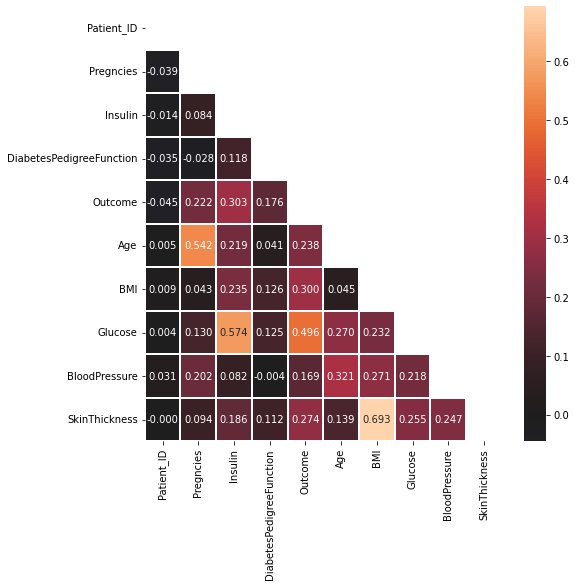

In [ ]:
corr=df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()

In [ ]:
print(df.SkinThickness.mean())
print(df2.SkinThickness.mean())
print(df.SkinThickness.median())
print(df2.SkinThickness.median())
print(df.SkinThickness.mode())
print(df2.SkinThickness.mode())

29.178770949720672
28.884114583333332
29.0
28.0
0    32.0
dtype: float64
0    28.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


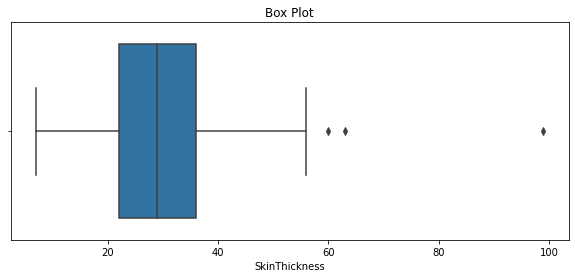

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


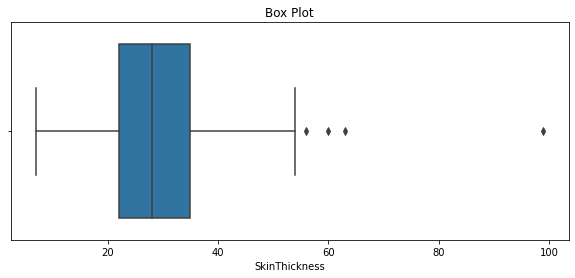

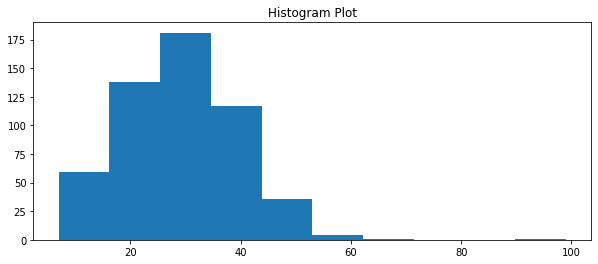

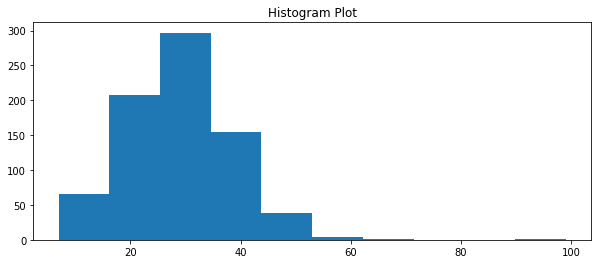

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


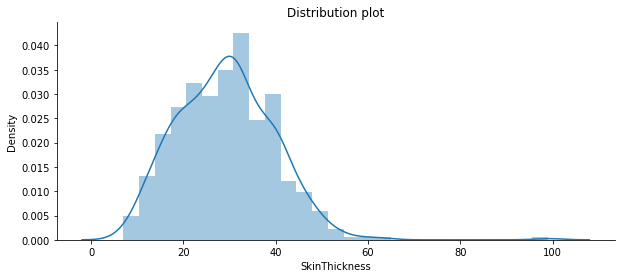

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


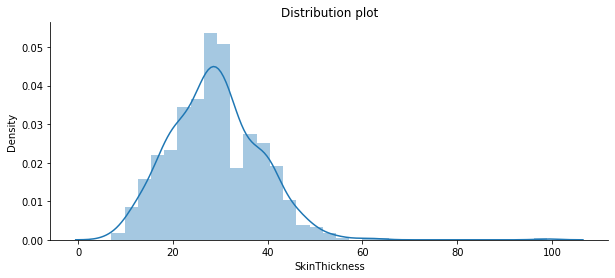

In [ ]:
Box_plots(df['SkinThickness'])
Box_plots(df2['SkinThickness'])
hist_plots(df['SkinThickness'])
hist_plots(df2['SkinThickness'])
dist_plots(df['SkinThickness'])
dist_plots(df2['SkinThickness'])

In [ ]:
Q1 = df2.SkinThickness.quantile(0.25)
Q3 = df2.SkinThickness.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)
# df1[(df1['Pregncies']>=14)|(df1['Pregncies']<0)]

22.0
35.0
2.5
54.5


In [ ]:
Q1 = df2.SkinThickness.quantile(0.25)
Q3 = df2.SkinThickness.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(round(upper_whisker,0))
df2['SkinThickness']=np.where(df2['SkinThickness']>round(upper_whisker,0),round(upper_whisker,0),df2['SkinThickness'])

22.0
35.0
2.5
54.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


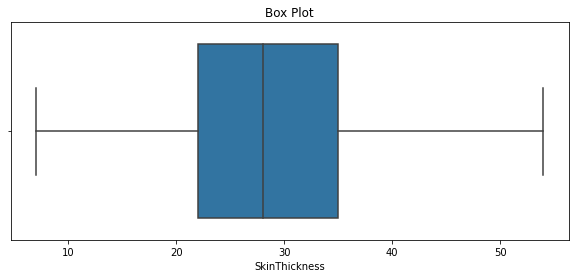

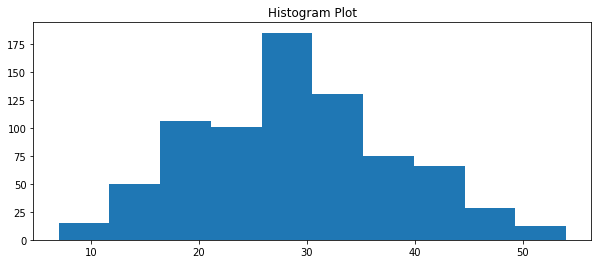

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


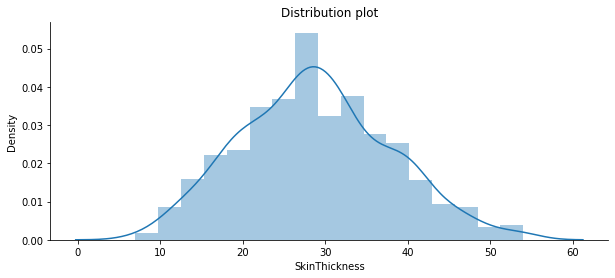

In [ ]:
Box_plots(df2['SkinThickness'])
hist_plots(df2['SkinThickness'])
dist_plots(df2['SkinThickness'])

In [ ]:
df.columns

Index(['Patient_ID', 'Pregncies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df2 = df2[['Patient_ID', 'Pregncies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [ ]:
df2.to_csv('preprocessed2.csv')
files.download('preprocessed2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df2.head()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35.0,NaN,33.6,0.627,50,1
1,2,1,85,66,29.0,NaN,26.6,0.351,31,0
2,3,8,183,64,21.0,NaN,23.3,0.672,32,1
3,4,1,89,66,23.0,94.0,28.1,0.167,21,0
4,5,3,137,40,35.0,168.0,43.1,1.766,33,1


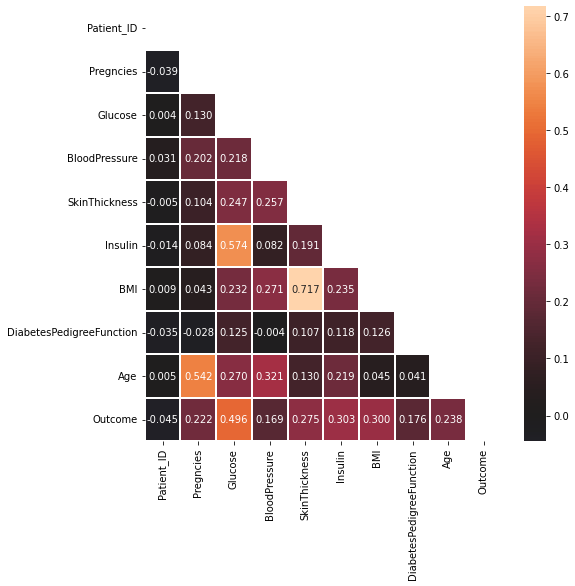

In [ ]:
corr=df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()

In [ ]:
dfreg1 = pd.DataFrame(data = df2, columns = ['Age','BMI','Glucose','Insulin'])
print(dfreg1.head())
print(dfreg1.shape)

   Age   BMI  Glucose  Insulin
0   50  33.6      148      NaN
1   31  26.6       85      NaN
2   32  23.3      183      NaN
3   21  28.1       89     94.0
4   33  43.1      137    168.0
(768, 4)


In [ ]:
traintest1 = dfreg1.dropna()
print(traintest1.shape)

print(traintest1.head())

traintest1x = traintest1.drop(['Insulin'],axis=1)
traintest1y = traintest1['Insulin']

X_train,X_test,y_train,y_test = train_test_split(traintest1x,traintest1y,test_size=0.2,random_state=0)

missdf = dfreg1[pd.isnull(dfreg1).any(axis=1)]
missdf = missdf.drop(['Insulin'],axis=1)
print(missdf.head())

model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

pred = model.predict(missdf)
print(pred)

In [ ]:
missdf['Insulin'] = pred.round(0)
print(missdf.head())

imputeddf = pd.concat([missdf,traintest1])
print(imputeddf.head())
print(imputeddf.shape)

   Age   BMI  Glucose  Insulin
0   50  33.6      148    224.0
1   31  26.6       85     65.0
2   32  23.3      183    264.0
5   33  25.6      116    129.0
7   29  35.3      115    146.0
   Age   BMI  Glucose  Insulin
0   50  33.6      148    224.0
1   31  26.6       85     65.0
2   32  23.3      183    264.0
5   33  25.6      116    129.0
7   29  35.3      115    146.0
(768, 4)


In [ ]:
df3 = df2.drop(['Age', 'BMI', 'Glucose', 'Insulin'],axis=1)
print(df3.shape)
print(df3.head())

df4 = pd.concat([df3, imputeddf], axis=1)
print(df4.shape)
print(df4.head())

(768, 6)
   Patient_ID  Pregncies  BloodPressure  SkinThickness  \
0           1          6             72           35.0   
1           2          1             66           29.0   
2           3          8             64           21.0   
3           4          1             66           23.0   
4           5          3             40           35.0   

   DiabetesPedigreeFunction  Outcome  
0                     0.627        1  
1                     0.351        0  
2                     0.672        1  
3                     0.167        0  
4                     1.766        1  
(768, 10)
   Patient_ID  Pregncies  BloodPressure  SkinThickness  \
0           1          6             72           35.0   
1           2          1             66           29.0   
2           3          8             64           21.0   
3           4          1             66           23.0   
4           5          3             40           35.0   

   DiabetesPedigreeFunction  Outcome  Age   BMI  

In [ ]:
df4.corr()

,Patient_ID,Pregncies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Outcome,Age,BMI,Glucose,Insulin
Patient_ID,1.000000,-0.039226,0.030518,-0.004565,-0.035320,-0.045184,0.005178,0.009480,0.003664,0.000982
Pregncies,-0.039226,1.000000,0.202197,0.103707,-0.028026,0.221641,0.541960,0.043361,0.129688,0.095083
BloodPressure,0.030518,0.202197,1.000000,0.256954,-0.004330,0.169278,0.320738,0.271159,0.218109,0.156452
SkinThickness,-0.004565,0.103707,0.256954,1.000000,0.107454,0.275138,0.130005,0.716606,0.246549,0.269537
DiabetesPedigreeFunction,-0.035320,-0.028026,-0.004330,0.107454,1.000000,0.175788,0.040701,0.126361,0.125280,0.128156
Outcome,-0.045184,0.221641,0.169278,0.275138,0.175788,1.000000,0.238217,0.299794,0.496302,0.365237
Age,0.005178,0.541960,0.320738,0.130005,0.040701,0.238217,1.000000,0.044589,0.269862,0.235880
BMI,0.009480,0.043361,0.271159,0.716606,0.126361,0.299794,0.044589,1.000000,0.232245,0.299115
Glucose,0.003664,0.129688,0.218109,0.246549,0.125280,0.496302,0.269862,0.232245,1.000000,0.696574
Insulin,0.000982,0.095083,0.156452,0.269537,0.128156,0.365237,0.235880,0.299115,0.696574,1.000000


In [ ]:
print(df2.Insulin.mean())
print(df4.Insulin.mean())
print(df2.Insulin.median())
print(df4.Insulin.median())
print(df2.Insulin.mode())
print(df4.Insulin.mode())

155.58778625954199
155.05729166666666
125.0
135.0
0    105.0
dtype: float64
0    105.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


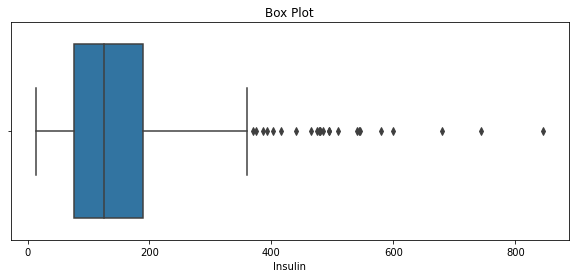

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


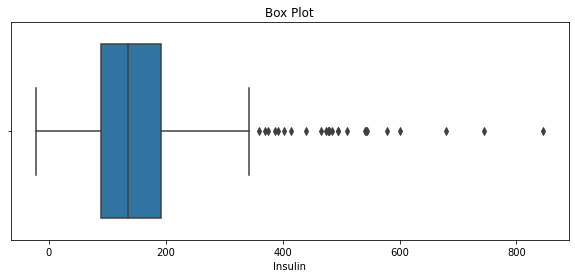

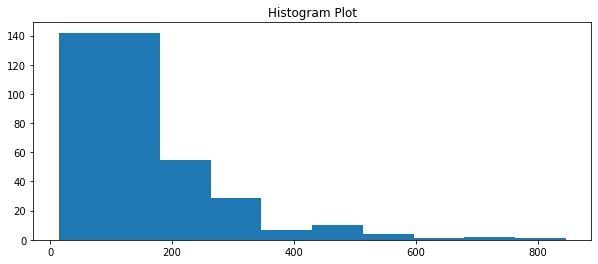

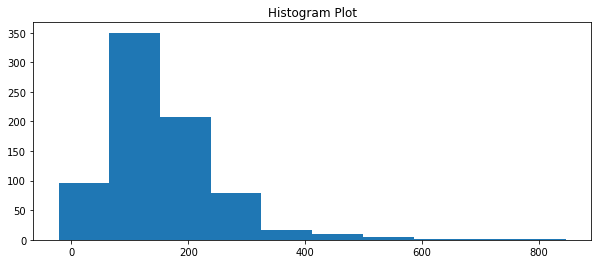

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


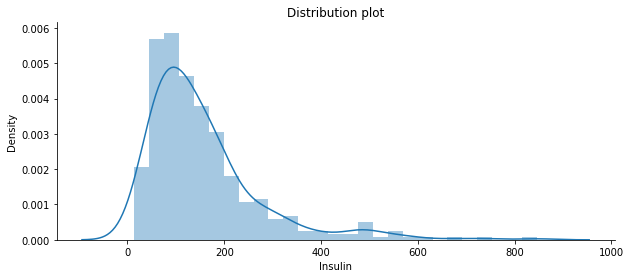

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


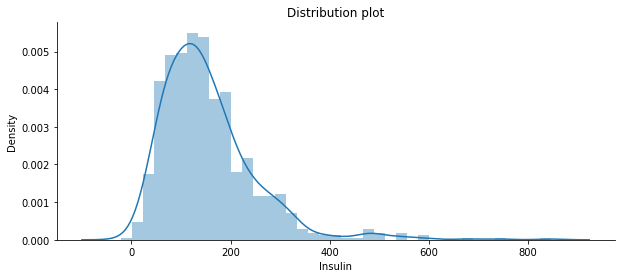

In [ ]:
Box_plots(df2['Insulin'])
Box_plots(df4['Insulin'])
hist_plots(df2['Insulin'])
hist_plots(df4['Insulin'])
dist_plots(df2['Insulin'])
dist_plots(df4['Insulin'])

In [ ]:
Q1 = df4.Insulin.quantile(0.25)
Q3 = df4.Insulin.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 3
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)

88.75
192.25
-221.75
502.75


In [ ]:
df4[df4['Insulin'] >= 502.75]

,Patient_ID,Pregncies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Outcome,Age,BMI,Glucose,Insulin
8,9,2,70,45.0,0.158,1,53,30.5,197,543.0
13,14,1,60,23.0,0.398,1,59,30.1,189,846.0
228,229,4,70,39.0,1.766,0,31,36.7,197,744.0
247,248,0,90,33.0,0.427,0,23,32.3,165,680.0
286,287,5,84,44.0,0.619,0,34,38.7,155,545.0
409,410,1,68,49.0,0.702,1,28,42.4,172,579.0
584,585,8,76,24.0,0.687,1,52,28.7,124,600.0
655,656,2,52,27.0,0.240,1,25,38.7,155,540.0
753,754,0,88,44.0,0.222,1,26,43.3,181,510.0


In [ ]:
medins = df4.Insulin.median()
Q1 = df4.Insulin.quantile(0.25)
Q3 = df4.Insulin.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 3
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
print(Q1)
print(Q3)
print(lower_whisker)
print(upper_whisker)
print(medins)
df4['Insulin']=np.where(df4['Insulin']>upper_whisker,medins,df4['Insulin'])

88.75
192.25
-221.75
502.75
135.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


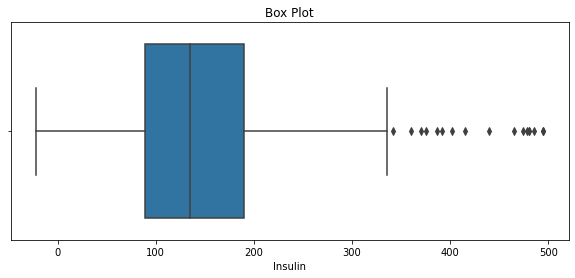

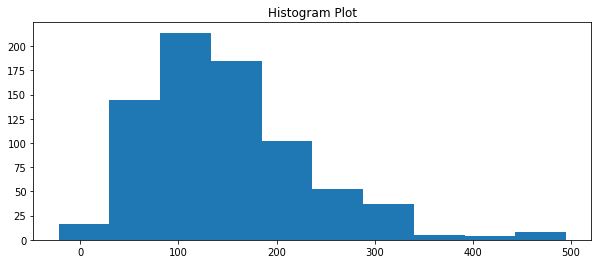

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


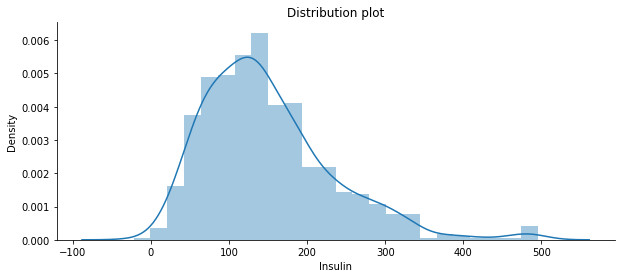

In [ ]:
Box_plots(df4['Insulin'])
hist_plots(df4['Insulin'])
dist_plots(df4['Insulin'])

In [ ]:
df4 = df4[['Patient_ID', 'Pregncies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [ ]:
df4.to_csv('preprocessed3.csv')
files.download('preprocessed3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df4.isna().sum()

Patient_ID                  0
Pregncies                   0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking Model Scores

In [ ]:
uploaded = files.upload()

Saving preprocessed3.csv to preprocessed3.csv


In [ ]:
df = pd.read_csv('preprocessed3.csv')
print(df.head())
print(df.shape)
print(df.isna().sum())

   Patient_ID  Pregncies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           1          6      148             72             35      224   
1           2          1       85             66             29       65   
2           3          8      183             64             21      264   
3           4          1       89             66             23       94   
4           5          3      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age  Outcome  
0  33.6                     0.627   50        1  
1  26.6                     0.351   31        0  
2  23.3                     0.672   32        1  
3  28.1                     0.167   21        0  
4  43.1                     1.766   33        1  
(768, 10)
Patient_ID                  0
Pregncies                   0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunctio

In [ ]:
x = df.drop(['Outcome','Patient_ID'],axis=1)
y = df['Outcome']
x.head()

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,224,33.6,0.627,50
1,1,85,66,29,65,26.6,0.351,31
2,8,183,64,21,264,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,3,137,40,35,168,43.1,1.766,33


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=17)
xtrain.head()

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
679,2,101,58,17,265,24.2,0.614,23
134,2,96,68,13,49,21.1,0.647,26
250,9,106,52,27,126,31.2,0.380,42
470,1,144,82,40,220,41.3,0.607,28
668,6,98,58,33,190,34.0,0.430,43


In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
acc = accuracy_score(ytest, pred)
f1 = f1_score(ytest,pred)
print(acc)
print(f1)

0.7012987012987013
0.5399999999999999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)
pred = nb.predict(xtest)
acc = accuracy_score(ytest, pred)
f1 = f1_score(ytest,pred)
print(acc)
print(f1)

0.7532467532467533
0.6274509803921567


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(xtrain,ytrain)
pred = knn.predict(xtest)
acc = accuracy_score(ytest, pred)
f1 = f1_score(ytest,pred)
print(acc)
print(f1)

0.7727272727272727
0.631578947368421


In [ ]:
rf = RandomForestClassifier(n_estimators = 70)
rf.fit(xtrain,ytrain)
pred = rf.predict(xtest)
acc = accuracy_score(ytest, pred)
f1 = f1_score(ytest,pred)
print(acc)
print(f1)

0.7857142857142857
0.6526315789473685


In [ ]:
sv = SVC()
sv.fit(xtrain,ytrain)
pred = sv.predict(xtest)
acc = accuracy_score(ytest, pred)
f1 = f1_score(ytest,pred)
print(acc)
print(f1)

0.7467532467532467
0.5617977528089887


In [ ]:
df1 = pd.read_csv('preprocessed1.csv')
df1.isna().sum()

Patient_ID                    0
Pregncies                     0
Glucose                       0
BloodPressure                 0
SkinThickness               231
Insulin                     375
BMI                           0
DiabetesPedigreeFunction      3
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df['SkinThickness'] = df1['SkinThickness']

In [ ]:
df.isna().sum()

Patient_ID                    0
Pregncies                     0
Glucose                       0
BloodPressure                 0
SkinThickness               231
Insulin                     375
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
cols = ['BMI', 'Glucose', 'BloodPressure','Age','DiabetesPedigreeFunction','Pregncies','SkinThickness']
X = df[cols]
X.head()

,BMI,Glucose,BloodPressure,Age,DiabetesPedigreeFunction,Pregncies,SkinThickness
0,33.6,148,72,50,0.627,6,35.0
1,26.6,85,66,31,0.351,1,29.0
2,23.3,183,64,32,0.672,8,NaN
3,28.1,89,66,21,0.167,1,23.0
4,43.1,137,40,33,1.766,3,35.0


In [ ]:
X.isna().sum()

BMI                           0
Glucose                       0
BloodPressure                 0
Age                           0
DiabetesPedigreeFunction      0
Pregncies                     0
SkinThickness               231
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=30)
df['SkinThickness'] = impute_knn.fit_transform(X)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
df['SkinThickness'] = impute_it.fit_transform(X)

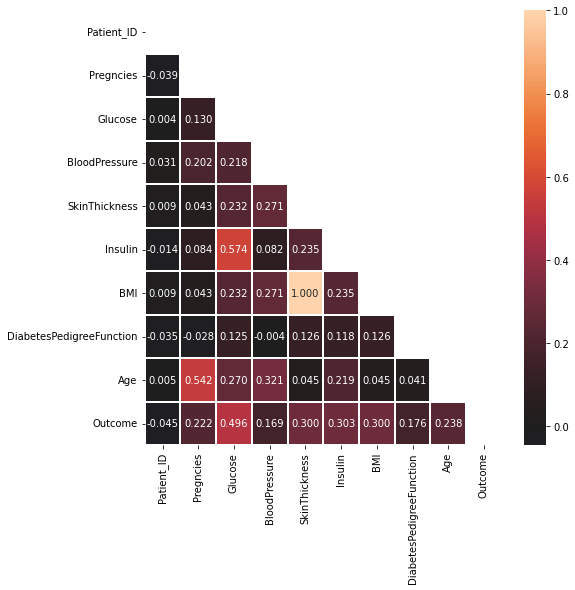

In [ ]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
df['SkinThickness'] = impute_it.fit_transform(X)

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=3)
df['SkinThickness'] = impute_knn.fit_transform(X)

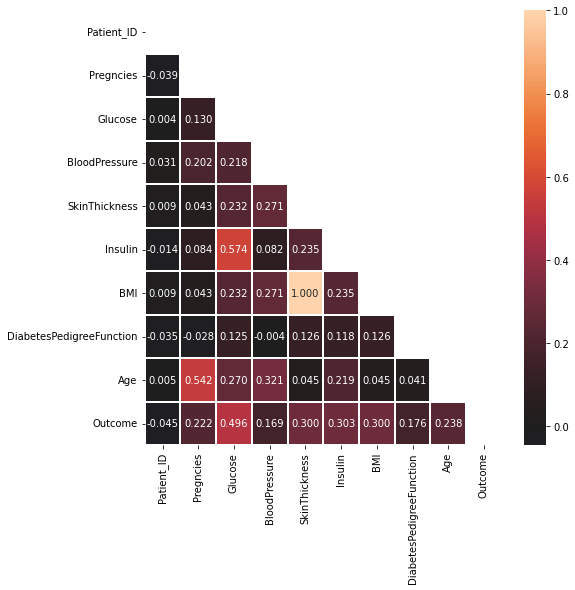

In [ ]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()